In [37]:
import numpy as np
import random
from IPython.display import display
import matplotlib.pyplot as plt

In [38]:
n = int(input('How large do you want your data to be? '))# muestras aleatorias
# generamos dos centros para las dos clases de puntos para entrenamiento 
c = int(input('How many clusters do you want to create? '))
clasificar = int(input('How many random values do you want to clasify? ')) 
k = int(input('How many neighbors do you want to use? '))

How large do you want your data to be? 50
How many clusters do you want to create? 5
How many random values do you want to clasify? 20
How many neighbors do you want to use? 5


In [39]:
#Creando los centros de cada uno de los clusters
centros = []
for i in range(c):
    centros.append([random.randint(0,1000),random.randint(0,1000)])

In [40]:
#Creando los valores de los clusters
valores = []
for i in range(c):
    valores.append([])
for i in range(int(n/c)):
    for p in range(len(centros)):
        valores[p].append([centros[p][0]+random.randint(-100,100),centros[p][1]+random.randint(-100,100)])
        

In [41]:
#Creando labels
labels = []
contador = 0
for i in range(c):
    for i in range(int(n/c)):
        labels.append(contador)
    contador += 1

# $Here$ $you$ $have$ $the$ $data$ $divided$ $by$ $groups$ 

In [42]:
x = []
y = []
for i in range(len(valores)):
    x.append([])
    y.append([])
    
for i in range(len(x)):
    for p in range(int(n/c)):
        x[i].append(valores[i][p][0])
        y[i].append(valores[i][p][1])

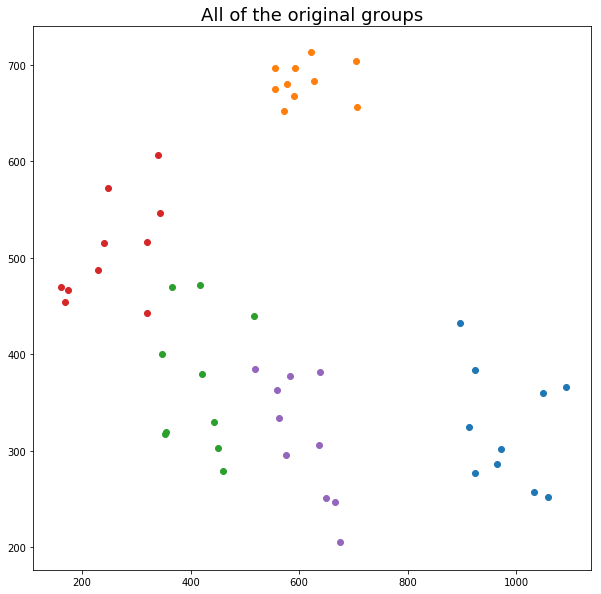

In [43]:
plt.figure(figsize=[10,10])
for i in range(c):
    plt.scatter(x[i],y[i])
    plt.title('All of the original groups',fontsize=18)

## $Here$ $you$ $have$ $thr$ $original$ $groups$ $plus$ $the$ $number$ $of$ $random$ $points$ $you$ $asked$ $for$

*cursiva*

In [44]:
# generamos puntos aleatorios nuevos para clasificarlos
tuplas = []
for i in range(clasificar):
    tuplas.append([random.randint(0,1000), random.randint(0,1000)])
puntos_test = np.matrix(tuplas)

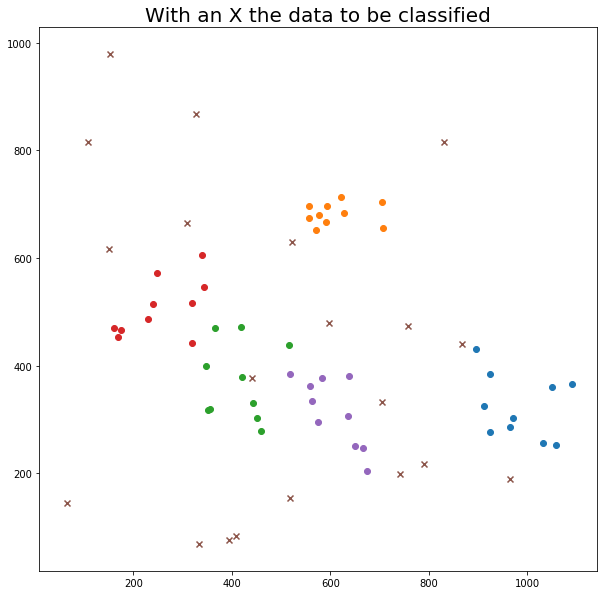

In [45]:
plt.figure(figsize=[10,10])
for i in range(c):
    plt.scatter(x[i],y[i])
    plt.title('With an X the data to be classified',fontsize=20)
plt.scatter([puntos_test[:,0]], [puntos_test[:,1]], marker='x')
plt.show()

In [46]:
puntos = []
for i in range(len(valores)):
    for p in range(int(n/c)):
        puntos.append((valores[i][p]))

In [47]:
ganador = []
pred_label = []
votos = 0
# clasificamos cada uno de los puntos nuevos
for i in range(clasificar):
    distances = []
    # por cada punto calculamos la distancia con los puntos de entrenamiento 
    for j in range((int(n/c))*c):
        dist = np.sqrt(np.sum(np.square(puntos[j] - puntos_test[i])))
        distances.append((dist, labels[j])) # guardamos las etiquetas y la distancia
        # ordenamos por distancia y nos quedamos con los k vecinos más cercanos
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    
    # Contamos los votos
    voto = 0
    for i in range(c):
        ganador.append([])
    for i in range(c):
        for neighbor in neighbors:
            if neighbor[1] == i:
                voto+=1
        ganador[i].append(voto)
        voto = 0
    pred_label.append(ganador.index(max(ganador)))
    ganador = []


In [59]:
pred_label

[3, 3, 2, 0, 4, 2, 4, 2, 1, 0, 4, 3, 1, 0, 1, 2, 3, 4, 3, 4]

In [62]:
puntos_test

matrix([[151, 617],
        [153, 980],
        [333,  68],
        [868, 440],
        [742, 199],
        [408,  84],
        [597, 479],
        [394,  77],
        [523, 629],
        [757, 474],
        [706, 333],
        [309, 665],
        [832, 816],
        [966, 189],
        [328, 867],
        [442, 377],
        [ 66, 145],
        [518, 154],
        [108, 815],
        [791, 217]])

### No pude seccionarlo por colores por las especificaciones de plt, pero está más que claro
    Ahora no puede decir que el código no es nuestro profe, *OBVIAMENTE* me basé de los principios de otro
    código, pero el 90% de lo escrito es nuestro... pónganos 100 <3

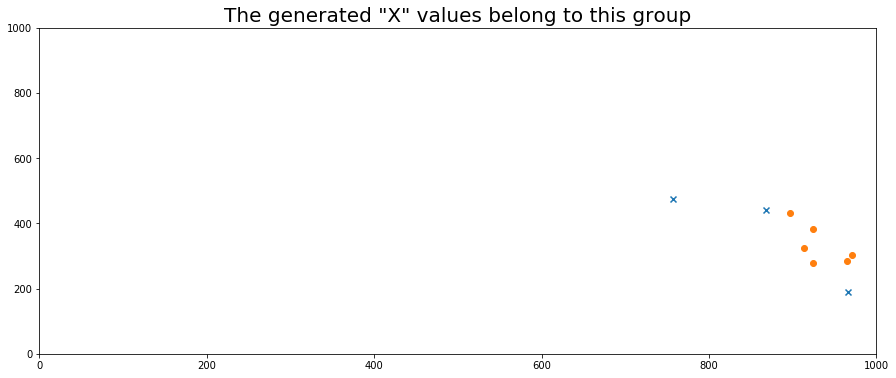

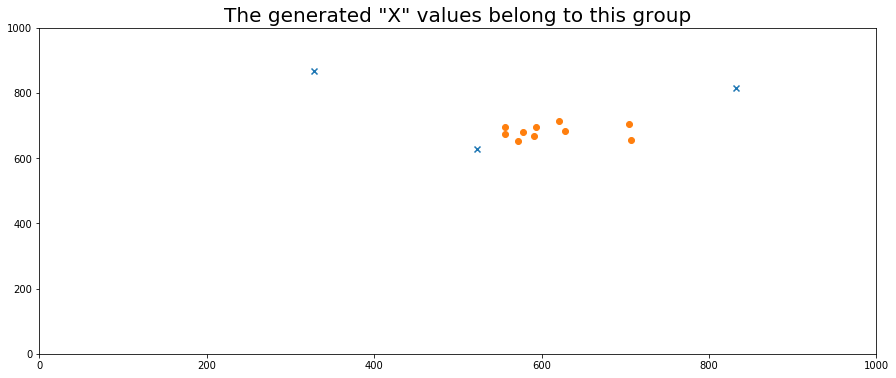

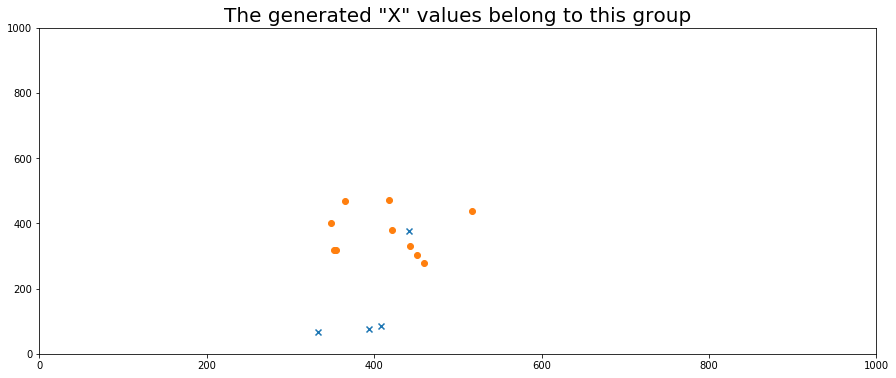

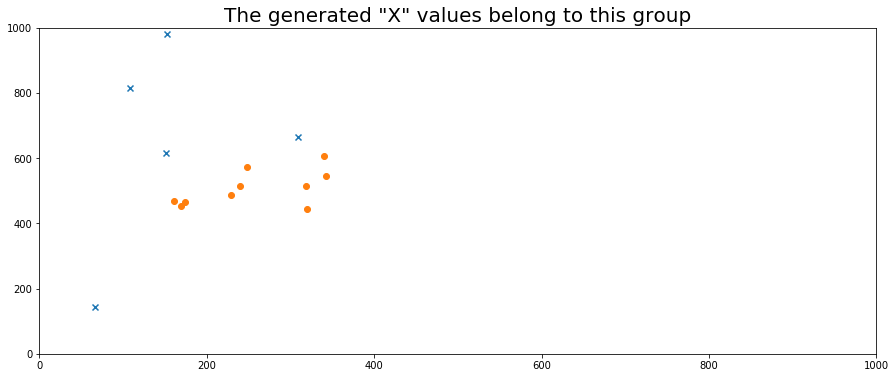

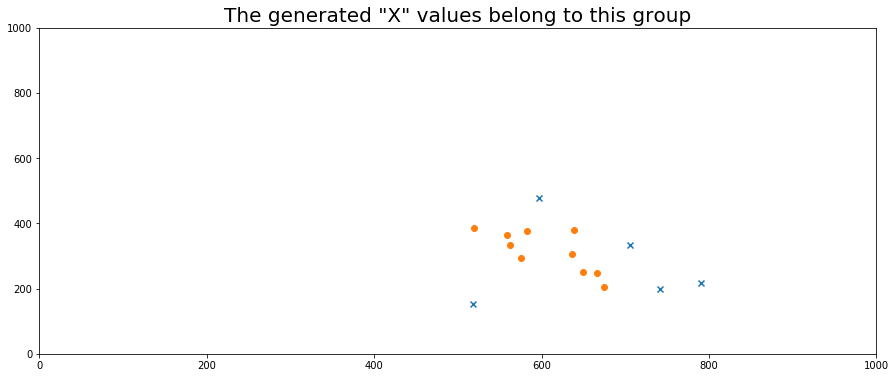

In [116]:
resultados = []
array = np.array(puntos_test)
for i in  range(c):
    for o in range(clasificar):
        if pred_label[o] == i:
            resultados.append(True)
        else:
            resultados.append(False)
    resultados = np.array(resultados)
    plot = array[resultados]
    plt.figure(figsize=[15,6])
    plt.xlim(0,1000)
    plt.ylim(0,1000)
    plt.scatter([plot[:,0]], [plot[:,1]], marker='x')
    plt.scatter(x[i],y[i])
    plt.title('The generated "X" values belong to this group',fontsize=20)
    plt.show()
    resultados = []